# Chapter 5. Resampling Method

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
auto_df = pd.read_csv("./data/Auto.csv",na_values="?") # horsepower contains "?" char

In [3]:
auto_df.dropna(inplace=True)
auto_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite


In [4]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
# check if there any nan in df
# but can't find other symbols
auto_df.isnull().values.any()

False

In [6]:
# check datatype of each column
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

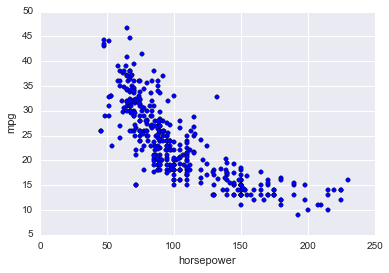

In [8]:
plt.scatter(auto_df.horsepower, auto_df.mpg)
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

In this practice we focus on `mpg` ~ `horsepower` and test the mse with higher degrees of `horsepower`:    
$mpg \sim horsepower $   
$mpg \sim horsepower + horsepower^2$    
$mpg \sim horsepower + horsepower^2 + horsepower^3 + \cdots$

In [ ]:
auto_df["horsepower^2"] = auto_df["horsepower"] * auto_df["horsepower"]
auto_df["horsepower^3"] = auto_df["horsepower^2"] * auto_df["horsepower"]
auto_df["horsepower^4"] = auto_df["horsepower^3"] * auto_df["horsepower"]
auto_df["horsepower^5"] = auto_df["horsepower^4"] * auto_df["horsepower"]

In [41]:
new_df = auto_df.ix[:, ["mpg","horsepower"]]
new_df["horsepower^2"] = new_df["horsepower"] * new_df["horsepower"]
new_df["horsepower^3"] = new_df["horsepower^2"] * new_df["horsepower"]
new_df["horsepower^4"] = new_df["horsepower^3"] * new_df["horsepower"]
new_df["horsepower^5"] = new_df["horsepower^4"] * new_df["horsepower"]
new_df["horsepower^6"] = new_df["horsepower^5"] * new_df["horsepower"]

In [42]:
new_df.head()

,mpg,horsepower,horsepower^2,horsepower^3,horsepower^4,horsepower^5,horsepower^6
0,18,130,16900,2197000,285610000,3.712930e+10,4.826809e+12
1,15,165,27225,4492125,741200625,1.222981e+11,2.017919e+13
2,18,150,22500,3375000,506250000,7.593750e+10,1.139062e+13
3,16,150,22500,3375000,506250000,7.593750e+10,1.139062e+13
4,17,140,19600,2744000,384160000,5.378240e+10,7.529536e+12


## K-fold Cross validation

In [45]:
new_df.shape

(392, 7)

In [47]:
new_df.ix[:, 1:7].head()

,horsepower,horsepower^2,horsepower^3,horsepower^4,horsepower^5,horsepower^6
0,130,16900,2197000,285610000,3.712930e+10,4.826809e+12
1,165,27225,4492125,741200625,1.222981e+11,2.017919e+13
2,150,22500,3375000,506250000,7.593750e+10,1.139062e+13
3,150,22500,3375000,506250000,7.593750e+10,1.139062e+13
4,140,19600,2744000,384160000,5.378240e+10,7.529536e+12


In [62]:
for i in range(2,7):
    print range(1,i)

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]


In [73]:
cv_errors = []
cv_scores = []
for ncol in range(2,8):
    X = new_df.ix[:,1:ncol].values
    y = new_df.mpg.values

    kf = KFold(new_df.shape[0], n_folds = 5)
    mses = []
    scores = []
    for train_index, test_index in kf:
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        clf = LinearRegression().fit(X_train, y_train)
        ypred = clf.predict(X_test)
        mses.append(mean_squared_error(ypred, y_test))
        scores.append( clf.score(X_test, y_test))
    cv_errors.append(np.mean(mses))
    cv_scores.append(np.mean(scores))

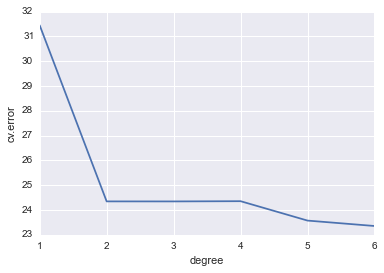

In [65]:
plt.plot(range(1,7), cv_errors)
plt.xlabel("degree")
plt.ylabel("cv.error")

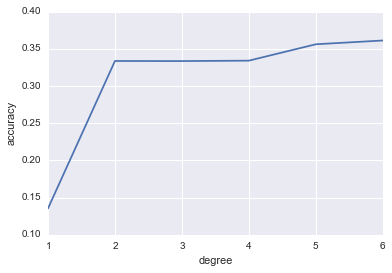

In [75]:
plt.plot(range(1,7), cv_scores)
plt.xlabel("degree")
plt.ylabel("accuracy")